# How Elon Musk affects the Crpytocurrency market

**In this Data Analysis Project I am going to be looking at Elon Musks Tweets from 2019 and 2020 alongside trading data for the cryptocurrency DogeCoin.**

**First I will read in and clean the tweets from Elon Musk, and then extract his tweets where he talks about DogeCoin.**

**I will then read in and clean the DogeCoin trading data, merge these datasets for 2019 and 2020 respectivley, and plot graphs to visualise how Elon Musks tweets affect these markets.**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

pd.options.mode.chained_assignment = None

import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogecoin-data/DOGE-USD.csv
/kaggle/input/elon-musk-tweets-2010-2021/2011.csv
/kaggle/input/elon-musk-tweets-2010-2021/2013.csv
/kaggle/input/elon-musk-tweets-2010-2021/2015.csv
/kaggle/input/elon-musk-tweets-2010-2021/2014.csv
/kaggle/input/elon-musk-tweets-2010-2021/2021.csv
/kaggle/input/elon-musk-tweets-2010-2021/2017.csv
/kaggle/input/elon-musk-tweets-2010-2021/2019.csv
/kaggle/input/elon-musk-tweets-2010-2021/2020.csv
/kaggle/input/elon-musk-tweets-2010-2021/2012.csv
/kaggle/input/elon-musk-tweets-2010-2021/2010.csv
/kaggle/input/elon-musk-tweets-2010-2021/2018.csv
/kaggle/input/elon-musk-tweets-2010-2021/2016.csv


# 1. Reading and Cleaning Tweet Data

In [2]:
_2010 = pd.read_csv('../input/elon-musk-tweets-2010-2021/2010.csv')
_2011 = pd.read_csv('../input/elon-musk-tweets-2010-2021/2011.csv')
_2012 = pd.read_csv('../input/elon-musk-tweets-2010-2021/2012.csv')
_2013 = pd.read_csv('../input/elon-musk-tweets-2010-2021/2013.csv')
_2014 = pd.read_csv('../input/elon-musk-tweets-2010-2021/2014.csv')
_2015 = pd.read_csv('../input/elon-musk-tweets-2010-2021/2015.csv')
_2016 = pd.read_csv('../input/elon-musk-tweets-2010-2021/2016.csv')
_2017 = pd.read_csv('../input/elon-musk-tweets-2010-2021/2017.csv')
_2018 = pd.read_csv('../input/elon-musk-tweets-2010-2021/2018.csv')
_2019 = pd.read_csv('../input/elon-musk-tweets-2010-2021/2019.csv')
_2020 = pd.read_csv('../input/elon-musk-tweets-2010-2021/2020.csv')
_2021 = pd.read_csv('../input/elon-musk-tweets-2010-2021/2021.csv')

In [3]:
tweets = pd.concat([_2010, _2011, _2012, _2013, _2014, _2015, _2016, _2017, _2018, _2019, _2020, _2021], axis = 0)

In [4]:
tweets.head()

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,15434727182,15434727182,1.275676e+12,2010-06-04 18:31:57,0,NaN,"Please ignore prior tweets, as that was someon...",en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
0,0,152153637639028736,152151847614943233,1.325111e+12,2011-12-28 22:27:08,0,NaN,@TheOnion So true :),en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1,151809315026636800,151809315026636800,1.325029e+12,2011-12-27 23:38:55,0,NaN,If you ever wanted to know the *real* truth ab...,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,2,151338939389706242,151338939389706242,1.324917e+12,2011-12-26 16:29:50,0,NaN,Walked around a neighborhood recently rebuilt ...,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,3,151337237429239808,151337237429239808,1.324917e+12,2011-12-26 16:23:04,0,NaN,"It was Xmas, so we brought presents for the ki...",en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [5]:
tweets = tweets.reset_index(drop=True)
tweets

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,15434727182,15434727182,1.275676e+12,2010-06-04 18:31:57,0,NaN,"Please ignore prior tweets, as that was someon...",en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,0,152153637639028736,152151847614943233,1.325111e+12,2011-12-28 22:27:08,0,NaN,@TheOnion So true :),en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1,151809315026636800,151809315026636800,1.325029e+12,2011-12-27 23:38:55,0,NaN,If you ever wanted to know the *real* truth ab...,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,2,151338939389706242,151338939389706242,1.324917e+12,2011-12-26 16:29:50,0,NaN,Walked around a neighborhood recently rebuilt ...,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,3,151337237429239808,151337237429239808,1.324917e+12,2011-12-26 16:23:04,0,NaN,"It was Xmas, so we brought presents for the ki...",en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43069,12334,142881284019060736,142881284019060736,1.322901e+12,2011-12-03 08:22:07,0,NaN,That was a total non sequitur btw,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
43070,12335,142880871391838208,142880871391838208,1.322900e+12,2011-12-03 08:20:28,0,NaN,"Great Voltaire quote, arguably better than Twa...",en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
43071,12336,142188458125963264,142188458125963264,1.322735e+12,2011-12-01 10:29:04,0,NaN,I made the volume on the Model S http://t.co/...,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
43072,12337,142179928203460608,142179928203460608,1.322733e+12,2011-12-01 09:55:11,0,NaN,Went to Iceland on Sat to ride bumper cars on ...,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [6]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43074 entries, 0 to 43073
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       43074 non-null  int64  
 1   id               43074 non-null  int64  
 2   conversation_id  43074 non-null  int64  
 3   created_at       43074 non-null  float64
 4   date             43074 non-null  object 
 5   timezone         43074 non-null  int64  
 6   place            0 non-null      float64
 7   tweet            43074 non-null  object 
 8   language         43074 non-null  object 
 9   hashtags         43074 non-null  object 
 10  cashtags         43074 non-null  object 
 11  user_id          43074 non-null  int64  
 12  user_id_str      43074 non-null  int64  
 13  username         43074 non-null  object 
 14  name             43074 non-null  object 
 15  day              43074 non-null  int64  
 16  hour             43074 non-null  int64  
 17  link        

In [7]:
tweets.describe()

,Unnamed: 0,id,conversation_id,created_at,timezone,place,user_id,user_id_str,day,hour,...,near,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src,trans_dest
count,43074.000000,4.307400e+04,4.307400e+04,4.307400e+04,43074.0,0.0,43074.0,43074.0,43074.000000,43074.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,4421.463064,9.094475e+17,9.072799e+17,1.505661e+12,0.0,NaN,44196397.0,44196397.0,4.119724,12.416678,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3507.366879,3.299130e+17,3.308282e+17,7.866693e+10,0.0,NaN,0.0,0.0,1.964297,7.767970,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.543473e+10,1.659576e+09,1.275676e+12,0.0,NaN,44196397.0,44196397.0,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1252.000000,7.286245e+17,7.265579e+17,1.462553e+12,0.0,NaN,44196397.0,44196397.0,2.000000,5.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3610.000000,1.008445e+18,1.008313e+18,1.529267e+12,0.0,NaN,44196397.0,44196397.0,4.000000,15.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7199.000000,1.156671e+18,1.155180e+18,1.564607e+12,0.0,NaN,44196397.0,44196397.0,6.000000,19.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,12338.000000,1.373819e+18,1.373669e+18,1.616379e+12,0.0,NaN,44196397.0,44196397.0,7.000000,23.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#only weant the tweets and the date
tweets = tweets[['date','tweet']]
tweets

,date,tweet
0,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someon..."
1,2011-12-28 22:27:08,@TheOnion So true :)
2,2011-12-27 23:38:55,If you ever wanted to know the *real* truth ab...
3,2011-12-26 16:29:50,Walked around a neighborhood recently rebuilt ...
4,2011-12-26 16:23:04,"It was Xmas, so we brought presents for the ki..."
...,...,...
43069,2011-12-03 08:22:07,That was a total non sequitur btw
43070,2011-12-03 08:20:28,"Great Voltaire quote, arguably better than Twa..."
43071,2011-12-01 10:29:04,I made the volume on the Model S http://t.co/...
43072,2011-12-01 09:55:11,Went to Iceland on Sat to ride bumper cars on ...


In [9]:
#Lets clean up the date format
tweets.date = tweets.date.str[:10] #tweets.date.str[:10]
tweets

,date,tweet
0,2010-06-04,"Please ignore prior tweets, as that was someon..."
1,2011-12-28,@TheOnion So true :)
2,2011-12-27,If you ever wanted to know the *real* truth ab...
3,2011-12-26,Walked around a neighborhood recently rebuilt ...
4,2011-12-26,"It was Xmas, so we brought presents for the ki..."
...,...,...
43069,2011-12-03,That was a total non sequitur btw
43070,2011-12-03,"Great Voltaire quote, arguably better than Twa..."
43071,2011-12-01,I made the volume on the Model S http://t.co/...
43072,2011-12-01,Went to Iceland on Sat to ride bumper cars on ...


In [10]:
#Lets clean the tweets (remove @'s' and urls and)
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
new = []
for t in tweets.tweet:
    words = t.split()
    t = t.split()
    t = ' '.join(word for word in t if not word.startswith('@'))
    t = t.split()
    t = ' '.join(word for word in t if not word.startswith('http'))
    new.append(t)
    
tweets['tweet'] = new
tweets

,date,tweet
0,2010-06-04,"Please ignore prior tweets, as that was someon..."
1,2011-12-28,So true :)
2,2011-12-27,If you ever wanted to know the *real* truth ab...
3,2011-12-26,Walked around a neighborhood recently rebuilt ...
4,2011-12-26,"It was Xmas, so we brought presents for the ki..."
...,...,...
43069,2011-12-03,That was a total non sequitur btw
43070,2011-12-03,"Great Voltaire quote, arguably better than Twa..."
43071,2011-12-01,I made the volume on the Model S go to 11. Now...
43072,2011-12-01,Went to Iceland on Sat to ride bumper cars on ...


# 2. Finding DogeCoin tweets

In [11]:
#Now dogecoin
doge = pd.DataFrame(columns = ['Date', 'Tweet'])

for i in range(len(tweets)):
    cur = tweets.loc[i].tweet
    cur = cur.lower()
    if 'doge' in cur:
        doge = doge.append({'Date' : tweets.loc[i].date, 'Tweet' : tweets.loc[i].tweet}, 
                ignore_index = True)

doge['Date'] = pd.to_datetime(doge['Date'], format='%Y-%m-%d')
doge

,Date,Tweet
0,2019-04-02,Dogecoin value may vary
1,2019-04-02,Dogecoin rulz
2,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s ...
3,2020-12-20,One word: Doge
4,2020-11-17,Dojo/Doge
5,2020-07-18,"Excuse me, I only sell Doge!"
6,2020-04-25,Dogecoin Mode
7,2019-04-02,Dogecoin value may vary
8,2019-04-02,Dogecoin rulz
9,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s ...


# 3. Reading and Cleaning DogeCoin Data

In [12]:
#Lets get our dogecoin data
dogeDf = pd.read_csv('../input/dogecoin-data/DOGE-USD.csv')
dogeDf

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,0.000293,0.000299,0.000260,0.000268,0.000268,1.463600e+06
1,2014-09-18,0.000268,0.000325,0.000267,0.000298,0.000298,2.215910e+06
2,2014-09-19,0.000298,0.000307,0.000275,0.000277,0.000277,8.835630e+05
3,2014-09-20,0.000276,0.000310,0.000267,0.000292,0.000292,9.930040e+05
4,2014-09-21,0.000293,0.000299,0.000284,0.000288,0.000288,5.391400e+05
...,...,...,...,...,...,...,...
2634,2021-12-03,0.209463,0.211991,0.193274,0.199993,0.199993,1.260948e+09
2635,2021-12-04,0.200356,0.200562,0.132826,0.178853,0.178853,4.388514e+09
2636,2021-12-05,0.178263,0.181133,0.162949,0.171255,0.171255,1.645331e+09
2637,2021-12-06,0.171383,0.180527,0.159558,0.178400,0.178400,1.896979e+09


In [13]:
#we will take the closing price from that day and the date
dogeDf = dogeDf[['Date','Close']]
dogeDf

,Date,Close
0,2014-09-17,0.000268
1,2014-09-18,0.000298
2,2014-09-19,0.000277
3,2014-09-20,0.000292
4,2014-09-21,0.000288
...,...,...
2634,2021-12-03,0.199993
2635,2021-12-04,0.178853
2636,2021-12-05,0.171255
2637,2021-12-06,0.178400


In [14]:
#Elon only started tweeting about it in 2019 so we will only use data from that point on (aka 2019, 2020, 2021)
dogeDf['Date'] = pd.to_datetime(dogeDf['Date'], format='%Y-%m-%d')
dogeDf

,Date,Close
0,2014-09-17,0.000268
1,2014-09-18,0.000298
2,2014-09-19,0.000277
3,2014-09-20,0.000292
4,2014-09-21,0.000288
...,...,...
2634,2021-12-03,0.199993
2635,2021-12-04,0.178853
2636,2021-12-05,0.171255
2637,2021-12-06,0.178400


# 4. Analysing 2019

In [15]:
doge2019 = dogeDf.loc[(dogeDf['Date'] >= '2019-01-01')
                     & (dogeDf['Date'] < '2019-12-31')]
doge2019

,Date,Close
1567,2019-01-01,0.002392
1568,2019-01-02,0.002407
1569,2019-01-03,0.002360
1570,2019-01-04,0.002315
1571,2019-01-05,0.002319
...,...,...
1926,2019-12-26,0.002058
1927,2019-12-27,0.002053
1928,2019-12-28,0.002064
1929,2019-12-29,0.002068


In [16]:
#Now lets see elons tweets in comparison, first lets merge the data
dogeElon2019 = doge2019.merge(doge, how='left', on='Date')

dogeElon2019 = dogeElon2019.dropna(axis=0)
dogeElon2019

#He tweeted all on the same day - lets see if it caused a spike

,Date,Close,Tweet
91,2019-04-02,0.002795,Dogecoin value may vary
92,2019-04-02,0.002795,Dogecoin rulz
93,2019-04-02,0.002795,Dogecoin might be my fav cryptocurrency. It’s ...
94,2019-04-02,0.002795,Dogecoin value may vary
95,2019-04-02,0.002795,Dogecoin rulz
96,2019-04-02,0.002795,Dogecoin might be my fav cryptocurrency. It’s ...
97,2019-04-02,0.002795,Dogecoin value may vary
98,2019-04-02,0.002795,Dogecoin rulz
99,2019-04-02,0.002795,Dogecoin might be my fav cryptocurrency. It’s ...


Text(0.5, 1.0, 'Dogecoin 2019')

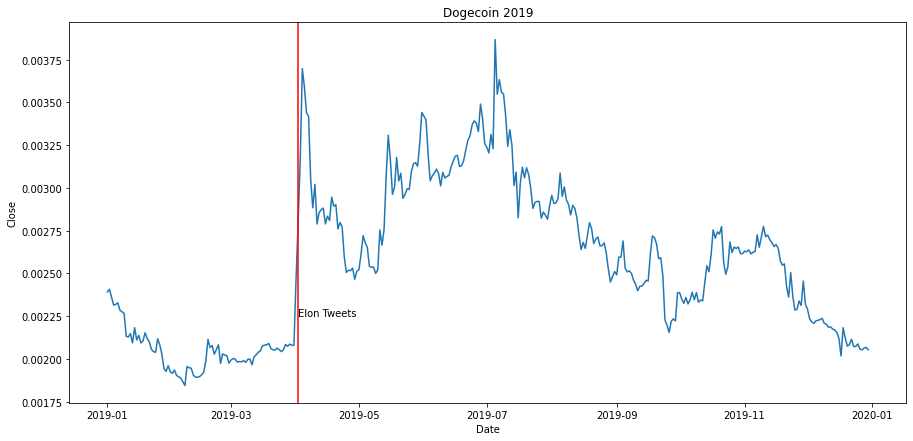

In [17]:
plt.figure(figsize=(15, 7))
ax = sns.lineplot(x = doge2019.Date, y = doge2019.Close)

x = pd.Timestamp('2019-04-02')
plt.axvline(x,color='r')
ax.annotate('Elon Tweets', xy =(x, 0.00225),xytext =(x,0.00225))
ax.set_title("Dogecoin 2019")

# 5. Analysing 2020

In [18]:
#Now for 2020
doge2020 = dogeDf.loc[(dogeDf['Date'] >= '2020-01-01')
                     & (dogeDf['Date'] < '2020-12-31')]
doge2020

,Date,Close
1932,2020-01-01,0.002033
1933,2020-01-02,0.002009
1934,2020-01-03,0.002145
1935,2020-01-04,0.002241
1936,2020-01-05,0.002419
...,...,...
2292,2020-12-26,0.004494
2293,2020-12-27,0.004548
2294,2020-12-28,0.004592
2295,2020-12-29,0.004486


In [19]:
dogeElon2020 = doge2020.merge(doge, how='left', on='Date')

dogeElon2020 = dogeElon2020.dropna(axis=0)
dogeElon2020 = dogeElon2020.drop_duplicates(subset=['Tweet'])
dogeElon2020

,Date,Close,Tweet
115,2020-04-25,0.002142,Dogecoin Mode
200,2020-07-18,0.003473,"Excuse me, I only sell Doge!"
323,2020-11-17,0.002936,Dojo/Doge
357,2020-12-20,0.004625,One word: Doge


Text(0.5, 1.0, 'Dogecoin 2020')

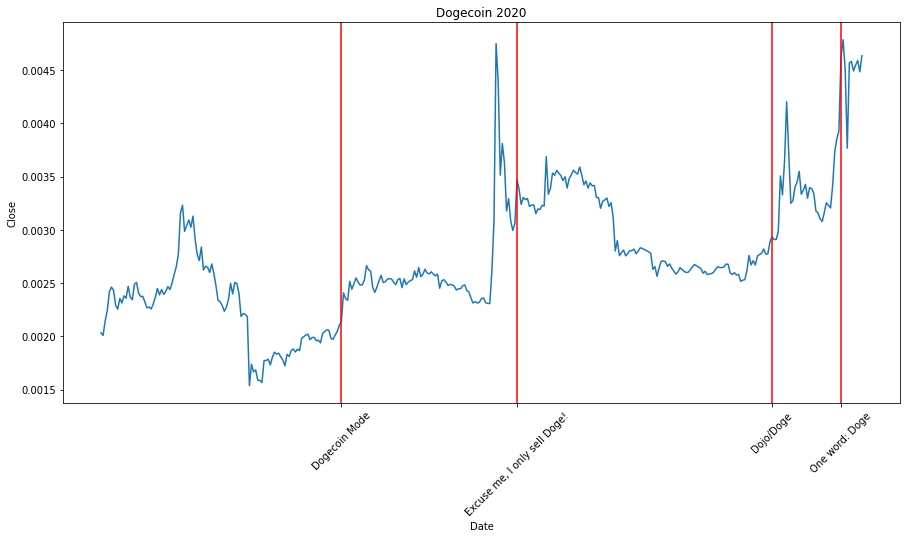

In [20]:
plt.figure(figsize=(15, 7))
ax = sns.lineplot(x = doge2020.Date, y = doge2020.Close)

#x = pd.Timestamp('2019-04-02')
#plt.axvline(x,color='r')

for i in dogeElon2020.Date:
    x = pd.Timestamp(i)
    plt.axvline(x,color='r')

ax.set_xticks(dogeElon2020.Date) 
ax.set_xticklabels(dogeElon2020.Tweet, rotation=45)

ax.set_title("Dogecoin 2020")


*Note: This dataset only goes up to march 2021 so I am not analysing this year*

**It is clear that Elon Musk has had a massive effect on DogeCoin as with every tweet there is a resulting increase in the trading price.**